# Sommaire

* [Introduction](#introduction)
* [I) Importation des données](#i)
* [II) Transformation des données](#ii)
* [III) Clustering](#iii)
    * [1) k-Means](#iii1)
    * [2) Classification hiérarchique](#iii2)
    * [3) DBSCAN](#iii3)
* [IV) Comparaisons](#iv)
* [V) Choix du modèle et viusalisation](#v)

# Introduction <a class="anchor" id="introduction"></a>
Dans ce notebook, nous allons tester différents modèles de clustering.

# I) Importation des données <a class="anchor" id="i"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
data_gb = pd.read_pickle('data_gb.pkl')
data_gb

,customer_unique_id,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd,date_derniere_cmd
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,5.0,113,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,4.0,116,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,1,86.22,3.0,539,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,323,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,5.0,290,2017-11-14 19:45:42
...,...,...,...,...,...,...
95059,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,5.0,449,2017-06-08 21:00:36
95060,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,4.0,264,2017-12-10 20:07:56
95061,ffff371b4d645b6ecea244b27531430a,1,112.46,5.0,570,2017-02-07 15:49:16
95062,ffff5962728ec6157033ef9805bacc48,1,133.69,5.0,121,2018-05-02 15:17:41


# II) Transformation des données <a class="anchor" id="ii"></a>

In [3]:
#On se sépare de customer_id_unique et date_derniere_cmd qui n'interviennent pas dans la modélisation
X = data_gb.iloc[:, 1:-1]
X

,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd
0,1,141.90,5.0,113
1,1,27.19,4.0,116
2,1,86.22,3.0,539
3,1,43.62,4.0,323
4,1,196.89,5.0,290
...,...,...,...,...
95059,1,2067.42,5.0,449
95060,1,84.58,4.0,264
95061,1,112.46,5.0,570
95062,1,133.69,5.0,121


In [4]:
#On enregistre les features
cols = X.columns
cols

Index(['nb_commandes', 'panier_moyen', 'review_score_moyen',
       'jours_depuis_derniere_cmd'],
      dtype='object')

In [5]:
#On centre et réduit
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.16116719, -0.07059587,  0.68164238, -0.83513032],
       [-0.16116719, -0.59647293, -0.06401857, -0.81532264],
       [-0.16116719, -0.32585553, -0.80967951,  1.97756012],
       [-0.16116719, -0.52115116, -0.06401857,  0.55140722],
       [-0.16116719,  0.18150054,  0.68164238,  0.33352275]])

# III) Clustering <a class="anchor" id="iii"></a>
## 1) k-Means <a class="anchor" id="iii1"></a>

In [88]:
#On teste plusieurs valeurs de k pour voir laquelle est la plus adaptée
#Pour enregistrer les inerties intraclasses
liste_inertie =[]

#Nombre de clusters (on prévoit large)
k_list = range(1, 16)

#On instancie
for k in k_list :
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X_scaled)
    liste_inertie.append(kmeans.inertia_)

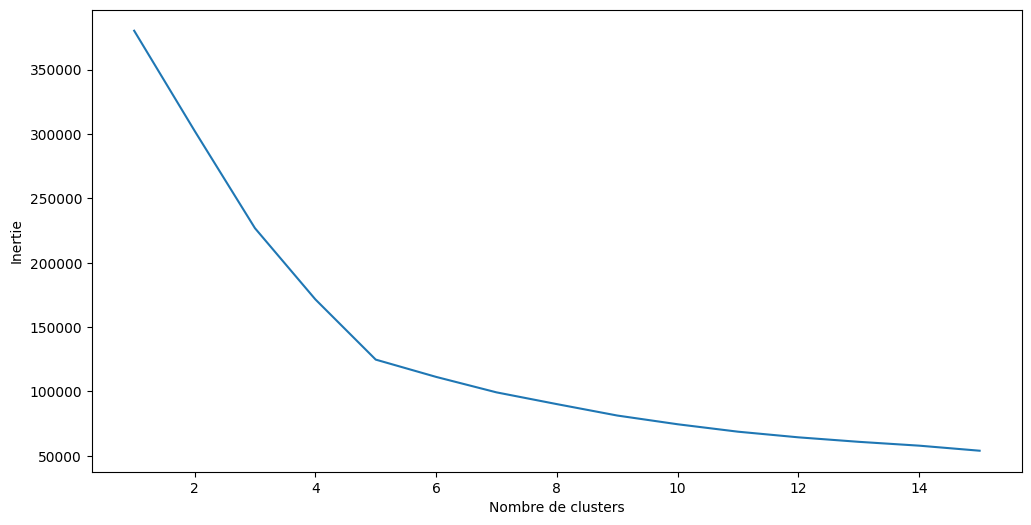

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.set_ylabel("Inertie")
ax.set_xlabel("Nombre de clusters")

ax = plt.plot(k_list, liste_inertie)

In [90]:
#Selon ce graphique, en appliquant la méthode du coude, il semblerait que 5 clusters soient plus adapté
kmeans = KMeans(n_clusters=5, n_init=20, random_state=42)
kmeans.fit(X_scaled)

#Les clusters
clusters_k = kmeans.labels_

#On ajoute une colonne clusters_k dans le df
X_k = X.copy()
X_k['clusters_k'] = clusters_k
X_k

,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd,clusters_k
0,1,141.90,5.0,113,2
1,1,27.19,4.0,116,2
2,1,86.22,3.0,539,0
3,1,43.62,4.0,323,0
4,1,196.89,5.0,290,0
...,...,...,...,...,...
95059,1,2067.42,5.0,449,4
95060,1,84.58,4.0,264,0
95061,1,112.46,5.0,570,0
95062,1,133.69,5.0,121,2


In [9]:
X_k['clusters_k'].value_counts()

clusters_k
0    41712
2    31669
1    16659
3     2920
4     2104
Name: count, dtype: int64

In [10]:
#Peu d'individus dans les clusters 3 et 4
#Un peu de visualisation pour expliquer les clusters, on commence par le nombre de commandes
pd.crosstab(X_k['nb_commandes'], X_k['clusters_k'])

clusters_k,0,1,2,3,4
nb_commandes,,,,,
1,41712,16659,31669,0,2095
2,0,0,0,2680,8
3,0,0,0,191,1
4,0,0,0,30,0
5,0,0,0,8,0
6,0,0,0,6,0
7,0,0,0,3,0
9,0,0,0,1,0
17,0,0,0,1,0


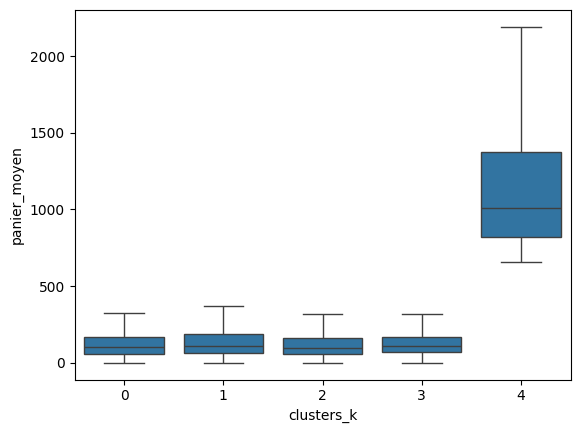

In [11]:
#Panier moyen
sns.boxplot(data=X_k, x='clusters_k', y='panier_moyen', showfliers=False)
plt.show()

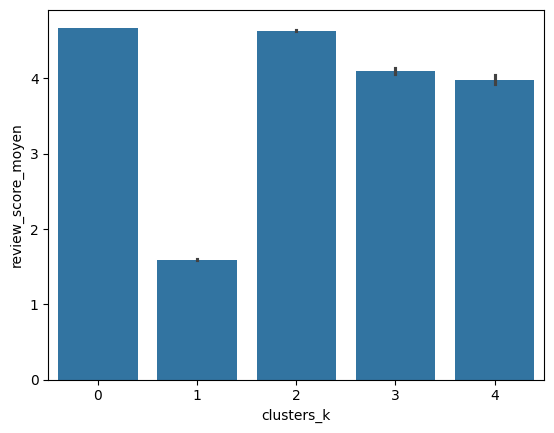

In [12]:
#Review score moyen
sns.barplot(data=X_k, x='clusters_k', y='review_score_moyen')
plt.show()

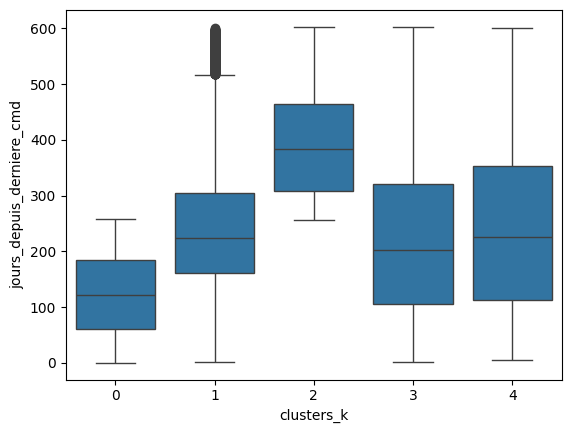

In [13]:
#Et enfin, jours depuis la dernière commande
sns.boxplot(data=X_k, x='clusters_k', y='jours_depuis_derniere_cmd')
plt.show()

- Le cluster 0 regroupe les clients n'ayant plus commandé depuis moins de 250 jours
- Le cluster 1 regroupe les clients ayant un faible review score moyen
- Le cluster 2 regroupe les clients n'ayant plus commandé depuis plus de 250 jours
- Le cluster 3 regroupe les clients ayant passé plusieurs commandes
- Le cluster 4 regroupe les clients ayant des paniers moyens élevés

On enchaîne avec un autre mode de clustering pour comparer les résultats.
## 2) Classification hiérarchique <a class="anchor" id="iii2"></a>

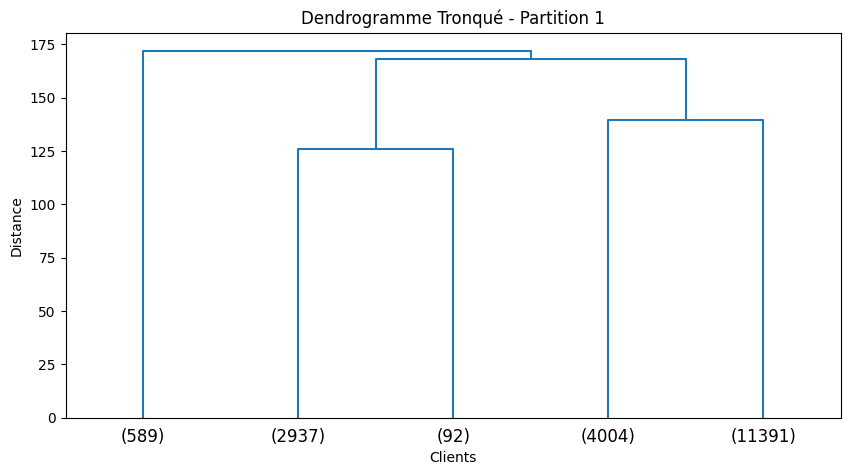

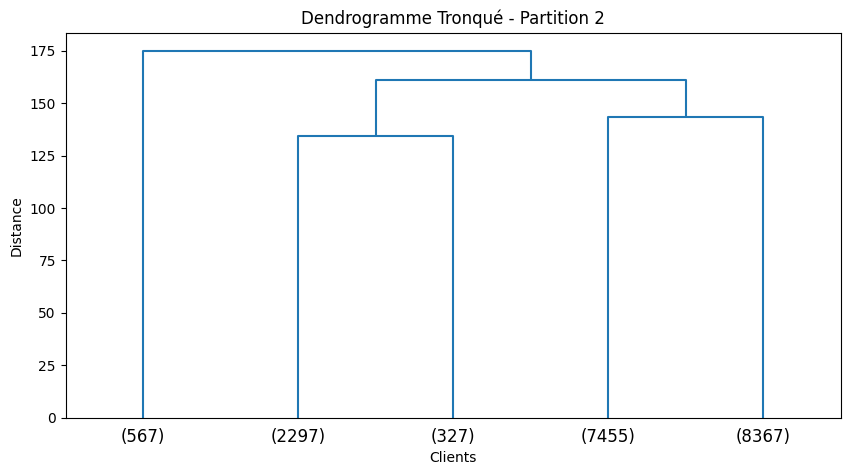

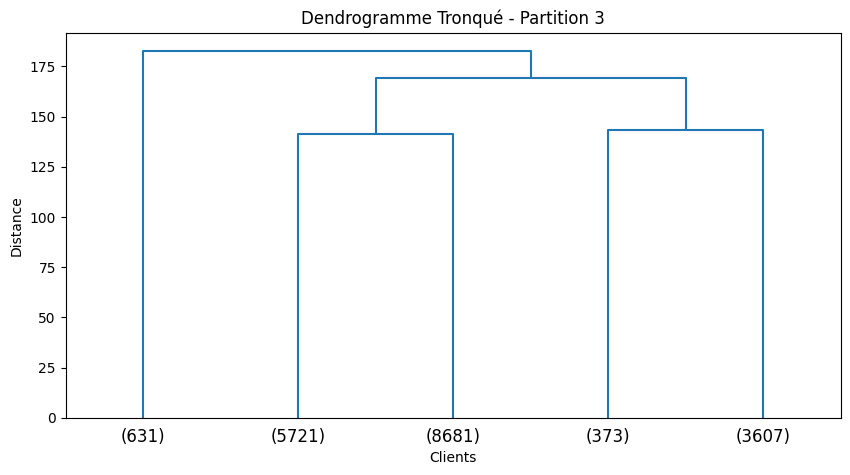

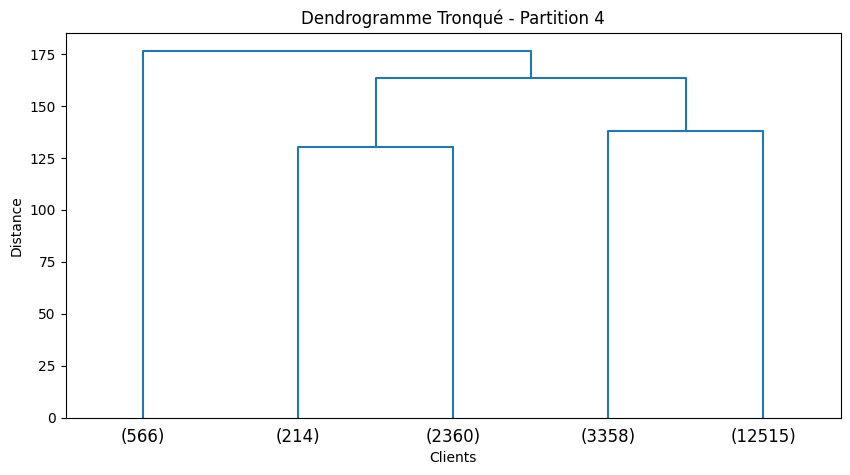

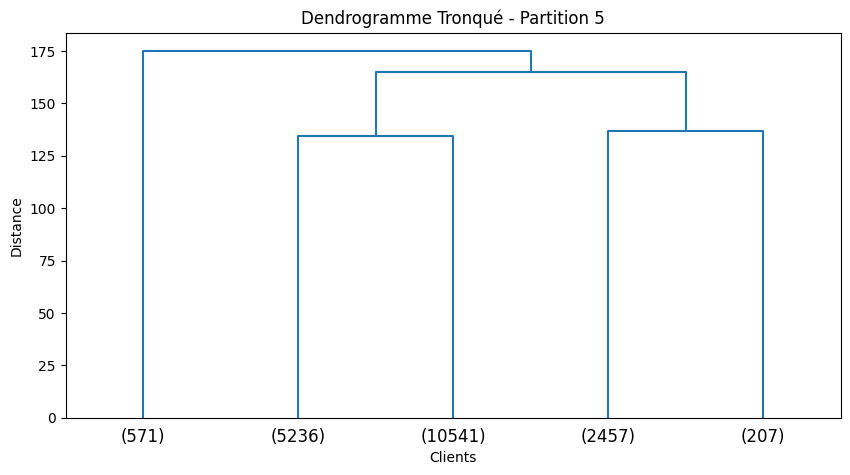

In [14]:
#Notre jeu de données est trop volumineux (problème de mémoire), nous allons donc partitionner et générer plusieurs dendrogrammes
#J'ai déjà fait tourner le code une fois et les dendrogrammes sont surchargés, ils semblent cependant faire ressortir 5 clusters à chaque fois donc on coupe en conséquence avec p=5
def partition(data, n_partitions, method='ward', truncate_mode='lastp', p=5):
    partitions = np.array_split(data, n_partitions)
    dendrograms = []
    clusters_d = []
    
    for i, partition in enumerate(partitions):
        Z = linkage(partition, method=method)
        dendrograms.append(Z)

        #On coupe comme mentionné plus haut
        labels = fcluster(Z, t=5, criterion='maxclust')
        clusters_d.append(labels)

        #On affiche les dendrogrammes
        plt.figure(figsize=(10, 5))
        dendrogram(Z, truncate_mode=truncate_mode, p=p)
        plt.title(f'Dendrogramme Tronqué - Partition {i+1}')
        plt.xlabel('Clients')
        plt.ylabel('Distance')
        plt.show()
        
    return partitions, dendrograms, clusters_d

#On divise le jeu de données en 5 partitions et on applique le CAH sur chaque partition
n_partitions = 5
partitions, dendrograms, clusters_d = partition(X_scaled, n_partitions)

In [15]:
#On va maintenant partitionner X de la même manière qu'on a partitionné X_scaled et ajouter une colonne clusters_d à chaque partition
partitions_X = np.array_split(X, n_partitions)

for i, partition_X in enumerate(partitions_X):
    partitions_X[i]['clusters_d'] = clusters_d[i]    

#On vérifie la première partition
partitions_X[0]

C:\Users\qveynacther\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd,clusters_d
0,1,141.90,5.0,113,5
1,1,27.19,4.0,116,5
2,1,86.22,3.0,539,2
3,1,43.62,4.0,323,4
4,1,196.89,5.0,290,5
...,...,...,...,...,...
19008,1,264.84,4.0,79,5
19009,1,95.87,5.0,359,4
19010,1,163.81,4.0,185,5
19011,1,299.68,2.0,23,5


In [16]:
for i, df in enumerate(partitions_X):
    print(f"Partition {i+1}:")
    display(df.groupby('clusters_d').mean().round(2))
    print()

Partition 1:


,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd
clusters_d,,,,
1,2.08,141.87,4.20,218.26
2,1.00,156.26,1.42,277.20
3,1.01,2186.11,3.35,242.28
4,1.00,117.58,4.75,434.78
5,1.00,157.29,4.54,163.24



Partition 2:


,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd
clusters_d,,,,
1,2.12,141.66,4.01,225.36
2,1.00,185.14,1.15,250.82
3,1.01,1301.58,4.24,232.91
4,1.00,141.82,4.43,109.64
5,1.00,120.23,4.61,352.58



Partition 3:


,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd
clusters_d,,,,
1,2.11,137.72,4.08,218.36
2,1.00,111.14,4.59,401.11
3,1.00,142.34,4.73,144.38
4,1.00,1294.83,4.03,221.76
5,1.00,152.90,1.71,215.71



Partition 4:


,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd
clusters_d,,,,
1,2.13,137.40,4.11,222.30
2,1.00,1545.86,3.50,276.03
3,1.00,164.42,1.16,241.69
4,1.00,115.61,4.53,465.92
5,1.00,142.32,4.53,178.90



Partition 5:


,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd
clusters_d,,,,
1,2.12,145.53,4.08,226.15
2,1.00,102.80,4.69,397.99
3,1.00,154.58,4.45,158.74
4,1.00,165.56,1.16,250.46
5,1.00,1625.53,3.91,224.42


J'ai utilisé groupby pour éviter de refaire des graphiques et tenter de gagner du temps. Il apparaît assez clairement que le cluster 1 présente les mêmes caractéristiques dans chaque partition et regroupe les clients ayant passé plus d'une commande.

Les autres clusters semblent regrouper :
- Les clients n'ayant plus commandé depuis longtemps
- Les clients ayant commandé récemment
- Les clients ayant un faible review score moyen
- Les clients ayant des paniers moyens élevés

Seulement, les labels des clusters diffèrent d'une partition à l'autre, nous allons donc harmoniser.

In [17]:
#On définit un mapping pour chaque partition, en conservant la partition 1 comme référence
mapping_2 = {4: 5, 5: 4}
mapping_3 = {2: 4, 3: 5, 4: 3, 5: 2}
mapping_4 = {2: 3, 3: 2}
mapping_5 = {2: 4, 4: 2, 3: 5, 5: 3}

#Liste des mappings par partition
mappings = [None, mapping_2, mapping_3, mapping_4, mapping_5]

#Une boucle par partition
for i, mapping in enumerate(mappings):
    if mapping:
        #On créé un mapping pour les clusters qui ne changent pas
        clusters_a_conserver = {k: k for k in partitions_X[i]['clusters_d'].unique() if k not in mapping.keys()}
        mapping_combiné = {**clusters_a_conserver, **mapping}
        
        #On applique
        partitions_X[i]['clusters_d'] = partitions_X[i]['clusters_d'].replace(mapping_combiné)

#Pour vérifier (la partition qui a eu le plus de changements)
partitions_X[2].groupby('clusters_d').mean().round(2)

,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd
clusters_d,,,,
1,2.11,137.72,4.08,218.36
2,1.00,152.90,1.71,215.71
3,1.00,1294.83,4.03,221.76
4,1.00,111.14,4.59,401.11
5,1.00,142.34,4.73,144.38


In [18]:
#C'est validé, on peut désormais concaténer les partitions
X_d = pd.concat(partitions_X, ignore_index =True)
X_d

,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd,clusters_d
0,1,141.90,5.0,113,5
1,1,27.19,4.0,116,5
2,1,86.22,3.0,539,2
3,1,43.62,4.0,323,4
4,1,196.89,5.0,290,5
...,...,...,...,...,...
95059,1,2067.42,5.0,449,3
95060,1,84.58,4.0,264,5
95061,1,112.46,5.0,570,4
95062,1,133.69,5.0,121,5


In [19]:
X_d['clusters_d'].value_counts()

clusters_d
5    50583
4    26686
2    13658
1     2924
3     1213
Name: count, dtype: int64

In [20]:
#Sans suprise, peu d'individus dans les clusters 1 et 3
#Comme avec kmeans on visualise en commencant par le nombre de commandes
pd.crosstab(X_d['nb_commandes'], X_d['clusters_d'])

clusters_d,1,2,3,4,5
nb_commandes,,,,,
1,0,13658,1208,26686,50583
2,2684,0,4,0,0
3,191,0,1,0,0
4,30,0,0,0,0
5,8,0,0,0,0
6,6,0,0,0,0
7,3,0,0,0,0
9,1,0,0,0,0
17,1,0,0,0,0


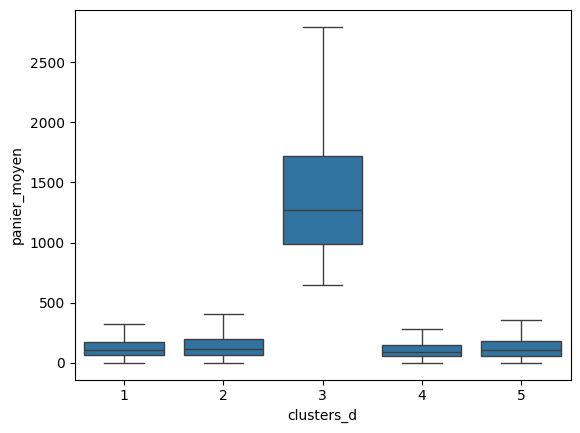

In [21]:
#Panier moyen
sns.boxplot(data=X_d, x='clusters_d', y='panier_moyen', showfliers=False)
plt.show()

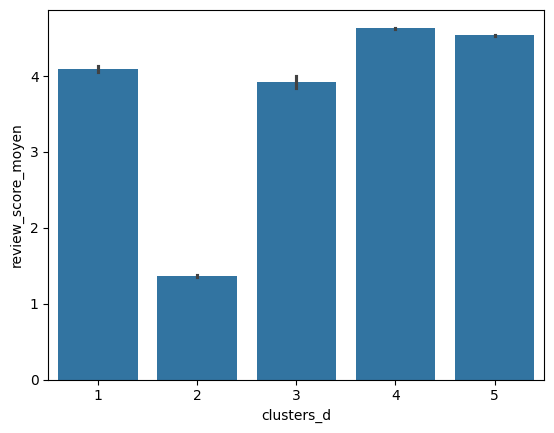

In [22]:
#On enchaîne avec le review score moyen
sns.barplot(data=X_d, x='clusters_d', y='review_score_moyen')
plt.show()

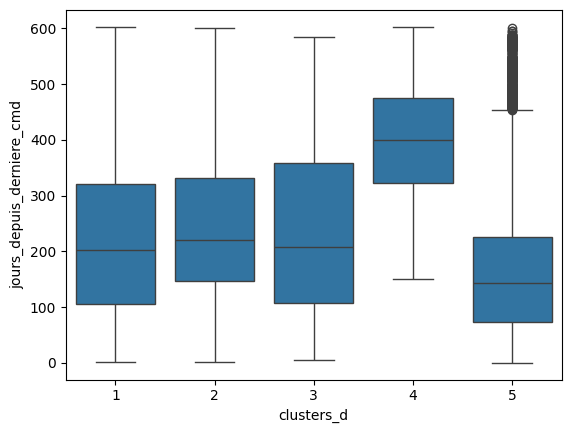

In [23]:
#Et on finit avec les jours depuis la dernière commande
sns.boxplot(data=X_d, x='clusters_d', y='jours_depuis_derniere_cmd')
plt.show()

Beaucoup d'efforts pour au final aboutir à des résultats similaires au kmeans. Globalement, je pense que le CAH est moins bien adapté à notre jeu de données.
## 3) DBSCAN <a class="anchor" id="iii3"></a>
Il y a 2 paramètres à considérer quand on utilise DBSCAN : min_samples et surtout eps. Il est recommandé que min_samples soit plus grand que la dimension du jeu de données, donc nous utiliserons min_samples = 5. Pour déterminer la meilleure valeur d'eps, une méthode consiste à utiliser k-NN, de prendre la valeur de min_samples comme k, de calculer la distance moyenne entre chaque points et ses k voisins les plus proches. En affichant les valeurs de façon ascendante, on devrait voir apparaître un coude dans la courbe (similaire au k-means), la distance au niveau du coude correspond à la valeur idéale d'eps.

Cependant, choisir un eps trop bas reviendrait à créer de nombreux clusters de peu d'individus, donc je prends la liberté de tâtonner avec ce paramètre, quitte à choisir une valeur plus haute que le coude observé.

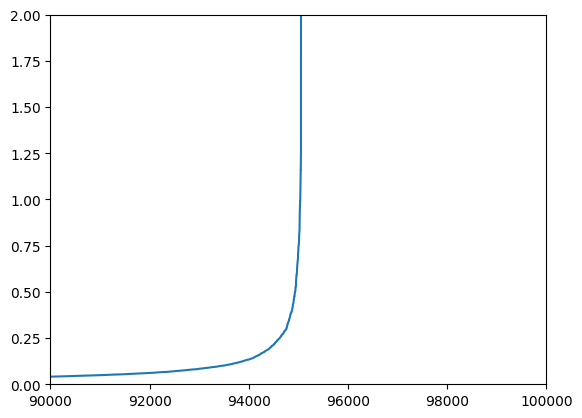

In [24]:
from sklearn.neighbors import NearestNeighbors
 
voisins = NearestNeighbors(n_neighbors=5)
kNN = voisins.fit(X_scaled)
distances, indices = kNN.kneighbors(X_scaled)
	
distances = np.sort(distances, axis=0)
distances = distances[:,1]

#On zoome sur le coude
plt.xlim(90000, 100000)
plt.ylim(0, 2)

plt.plot(distances)
plt.show()

In [25]:
#Il semblerait que la meilleure valeur d'eps se situe autour de 0.5, mais ça a généré beaucoup de clusters (~50) alors j'utilise une valeur un peu plus élevée
dbscan = DBSCAN(eps=0.7, min_samples=5)
clusters_s = dbscan.fit_predict(X_scaled)

#On ajoute une colonne clusters_s dans le df
X_s = X.copy()
X_s['clusters_s'] = clusters_s
X_s

,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd,clusters_s
0,1,141.90,5.0,113,0
1,1,27.19,4.0,116,1
2,1,86.22,3.0,539,2
3,1,43.62,4.0,323,1
4,1,196.89,5.0,290,0
...,...,...,...,...,...
95059,1,2067.42,5.0,449,0
95060,1,84.58,4.0,264,1
95061,1,112.46,5.0,570,0
95062,1,133.69,5.0,121,0


In [26]:
X_s['clusters_s'].value_counts()

clusters_s
 0     53053
 1     17894
 3     10557
 2      7579
 4      2925
 5      2656
 6       179
-1       156
 7        22
 8         7
 9         6
 15        5
 14        5
 10        5
 12        5
 13        5
 11        5
Name: count, dtype: int64

In [27]:
#Le cluster -1 regroupe les points que DBSCAN a considéré comme bruyant
#Certains clusters regroupent très peu d'individus, on verra si on peut fusionner certains clusters
#On visualise en commencant par le nombre de commandes
pd.crosstab(X_s['nb_commandes'], X_s['clusters_s'])

clusters_s,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
nb_commandes,,,,,,,,,,,,,,,,,
1,94,53053,17894,7579,10557,2925,0,0,0,7,6,0,5,5,5,0,5
2,27,0,0,0,0,0,2656,0,0,0,0,0,0,0,0,5,0
3,13,0,0,0,0,0,0,179,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0
5,3,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


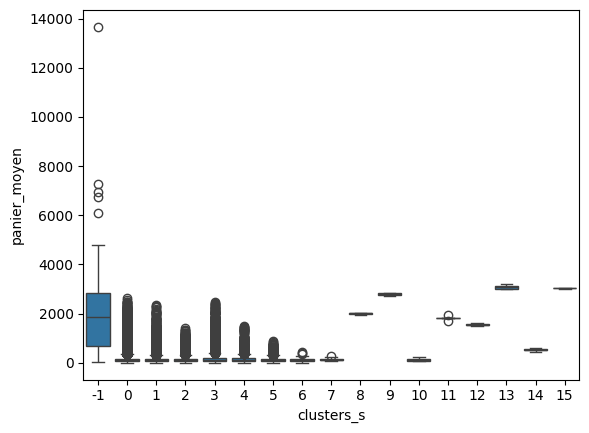

In [28]:
#On remarque ici que tous les clients ayant passé plus de 6 commandes sont regroupés dans le cluster -1
#Panier moyen
sns.boxplot(data=X_s, x='clusters_s', y='panier_moyen')
plt.show()

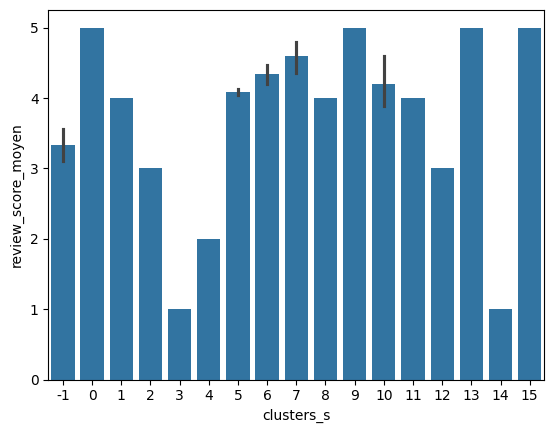

In [29]:
#Contrairement aux précédents modèles, tous les clients avec des paniers moyens élevés ne sont pas regroupés dans le même cluster
#Les clients ayants passé les plus grosses commandes sont également regroupés dans le cluster -1
#On enchaîne avec le review score moyen
sns.barplot(data=X_s, x='clusters_s', y='review_score_moyen')
plt.show()

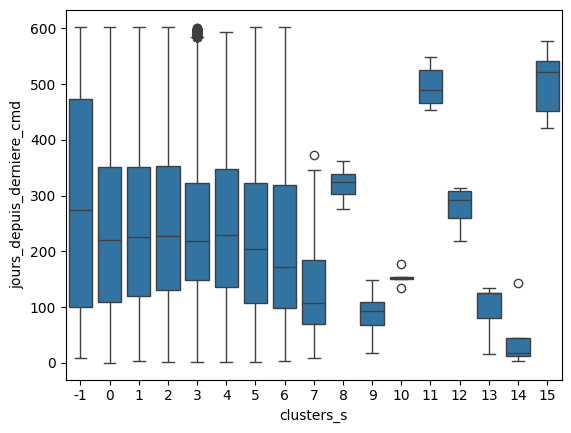

In [30]:
#Contrairement aux précédents modèles, tous les clients ayant laissé de mauvaises reviews ne sont pas regroupés dans le même cluster
#Pour l'instant la seule différence entre les clusters 0, 1, 2, 3 et 4 est le review_score_moyen, de même pour les clusters 5 et 14
#On finit avec les jours depuis la dernière commande
sns.boxplot(data=X_s, x='clusters_s', y='jours_depuis_derniere_cmd')
plt.show()

Pour rappel, les clusters 0 à 5 représentent 99% du jeu de données, il semblerait que cette feature n'ait pas eu que très peu de poids dans le modèle. J'ai le sentiment que DBSCAN nous complique un peu la tâche à générer davantage de clusters et est finalement moins adapté que k-means.
# IV) Comparaisons <a class="anchor" id="iv"></a>

In [31]:
#Tableau de contingence entre clusters k et d
pd.crosstab(X_k['clusters_k'], X_d['clusters_d']).reindex(columns=[5, 2, 4, 1, 3]) #Pour une meilleure lisibilité

clusters_d,5,2,4,1,3
clusters_k,,,,,
0,39218,506,1978,0,10
1,3227,12666,766,0,0
2,7414,361,23894,0,0
3,0,0,0,2920,0
4,724,125,48,4,1203


In [32]:
#Tableau de contingence entre clusters k et s
pd.crosstab(X_k['clusters_k'], X_s['clusters_s'])

clusters_s,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
clusters_k,,,,,,,,,,,,,,,,,
0,0,29948,9769,1995,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,3519,10268,2872,0,0,0,0,0,0,0,0,0,0,0
2,0,21971,7761,1937,0,0,0,0,0,0,0,0,0,0,0,0,0
3,53,0,0,0,0,0,2656,179,22,0,0,5,0,0,0,5,0
4,103,1134,364,128,289,53,0,0,0,7,6,0,5,5,5,0,5


In [33]:
#Tableau de contingence entre clusters d et s
pd.crosstab(X_d['clusters_d'], X_s['clusters_s'])

clusters_s,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
clusters_d,,,,,,,,,,,,,,,,,
1,57,0,0,0,0,0,2656,179,22,0,0,5,0,0,0,5,0
2,0,0,127,1372,10355,1804,0,0,0,0,0,0,0,0,0,0,0
3,98,636,182,53,187,24,0,0,0,7,6,0,5,5,5,0,5
4,0,19295,5289,1777,0,325,0,0,0,0,0,0,0,0,0,0,0
5,1,33122,12296,4377,15,772,0,0,0,0,0,0,0,0,0,0,0


# V) Choix du modèle et visualisation <a class="anchor" id="v"></a>

In [34]:
#On conserve donc le clustering du k-means, on va juste renommer les groupes en fonction de leurs caractéristiques
cluster_mapping = {0: "Nouveaux clients",
                   1: "Clients peu satisfaits",
                   2: "Anciens clients",
                   3: "Clients fréquents",
                   4: "Gros paniers moyens"}

X_k['clusters_k'] = X_k['clusters_k'].map(cluster_mapping)
X_k

,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd,clusters_k
0,1,141.90,5.0,113,Nouveaux clients
1,1,27.19,4.0,116,Nouveaux clients
2,1,86.22,3.0,539,Anciens clients
3,1,43.62,4.0,323,Anciens clients
4,1,196.89,5.0,290,Anciens clients
...,...,...,...,...,...
95059,1,2067.42,5.0,449,Gros paniers moyens
95060,1,84.58,4.0,264,Anciens clients
95061,1,112.46,5.0,570,Anciens clients
95062,1,133.69,5.0,121,Nouveaux clients


In [37]:
#On va réaliser une ACP pour visualiser les clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X_scaled)

#On calcule la variance cumulée
pca.explained_variance_ratio_.cumsum()

array([0.26407328, 0.51791624, 0.76388065, 1.        ])

In [51]:
#La variance est bien partagée entre nos 4 variables (24 à 26%)
#Le premier plan factoriel n'expliquerait que ~52% de la variance alors on va regarder les 2 premiers plans factoriels
pcs = pca.components_
pcs = pd.DataFrame(pcs, index=['F1', 'F2', 'F3', 'F4'], columns=cols)
pcs = pcs.round(2)
pcs

,nb_commandes,panier_moyen,review_score_moyen,jours_depuis_derniere_cmd
F1,-0.28,0.59,-0.66,0.36
F2,0.62,0.43,-0.22,-0.62
F3,0.71,-0.31,-0.26,0.58
F4,0.20,0.61,0.66,0.38


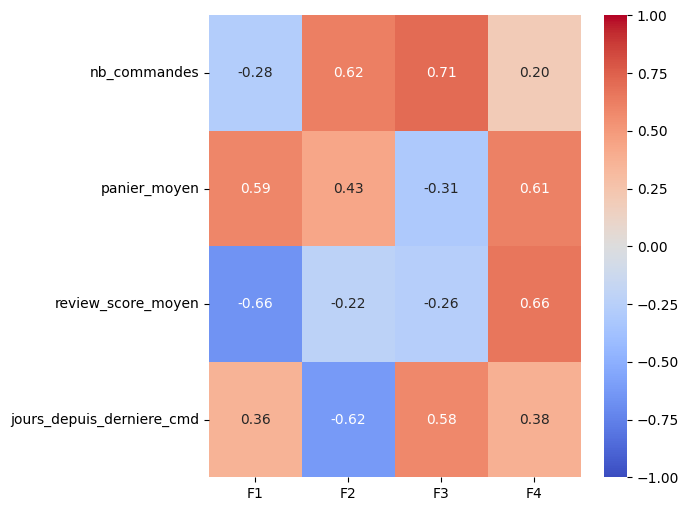

In [55]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

In [64]:
#On calcule les coordonnées des individus dans le nouvel espace projectif
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ['F1', 'F2', 'F3', 'F4'])
X_proj['clusters_k'] = X_k['clusters_k']
X_proj

,F1,F2,F3,F4,clusters_k
0,-0.750391,0.240093,-0.753964,0.062006,Nouveaux clients
1,-0.558362,0.170631,-0.387005,-0.748297,Nouveaux clients
2,1.105419,-1.292282,1.343868,-0.023568,Anciens clients
3,-0.020211,-0.651217,0.382826,-0.186209,Anciens clients
4,-0.179470,-0.382731,-0.153456,0.657685,Anciens clients
...,...,...,...,...,...
95059,5.260325,2.612617,-2.182996,6.310540,Gros paniers moyens
95060,-0.050114,-0.327876,0.099019,-0.218151,Anciens clients
95061,0.259918,-1.702599,1.038312,1.118277,Anciens clients
95062,-0.753523,0.191065,-0.711735,0.058873,Nouveaux clients


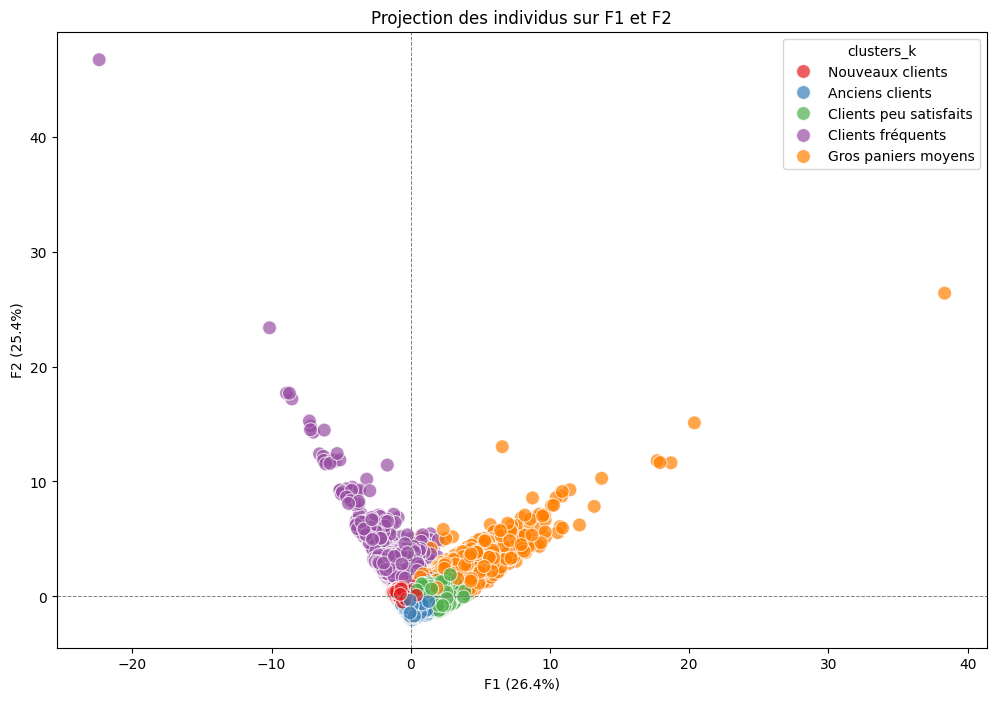

In [80]:
plt.figure(figsize=(12,8))
x, y = (0, 1)
sns.scatterplot(data=X_proj, x=X_proj.iloc[:, x], y=X_proj.iloc[:, y], hue='clusters_k', palette='Set1', s=100, alpha=0.7)
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
plt.title("Projection des individus sur F{} et F{}".format(x+1, y+1))
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.7)
plt.axhline(y=0, color='grey', linestyle='--', linewidth=0.7)
plt.show()

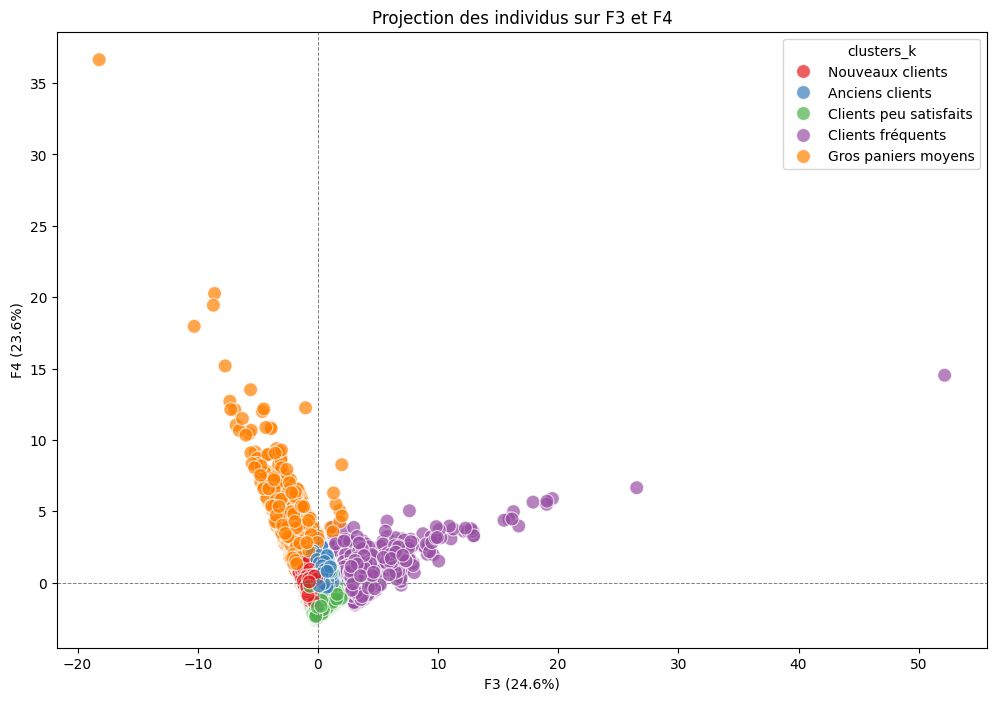

In [81]:
plt.figure(figsize=(12,8))
x, y = (2, 3)
sns.scatterplot(data=X_proj, x=X_proj.iloc[:, x], y=X_proj.iloc[:, y], hue='clusters_k', palette='Set1', s=100, alpha=0.7)
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
plt.title("Projection des individus sur F{} et F{}".format(x+1, y+1))
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.7)
plt.axhline(y=0, color='grey', linestyle='--', linewidth=0.7)
plt.show()